<a href="https://colab.research.google.com/github/rakibsxyz/100-days-of-code/blob/master/tfIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install texthero


In [15]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
data = pd.read_csv("shortData.csv")

In [28]:
MethodData = data.iloc[:0]

In [36]:
v = TfidfVectorizer()
x = v.fit_transform(data["method"])

In [43]:
data["tf"] = x.toarray()

In [ ]:
data["tf"].head

In [42]:
data.shape

(33, 3)

In [45]:
from scipy import spatial

In [46]:
result = 1 - spatial.distance.cosine(data["callTime"], data["tf"])

In [47]:
print(result)

0.6238471670640428


In [48]:
x = data["callTime"]
y = data["tf"]

In [49]:
import numpy as np
X = np.vstack((x, y)).T


In [ ]:
print(X)

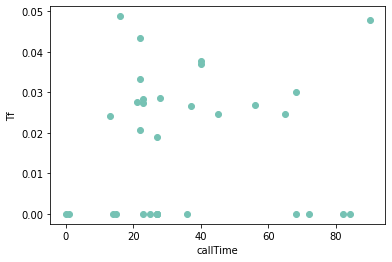

In [52]:
import matplotlib.pyplot as plt
plt.xlabel("callTime")
plt.ylabel("Tf")
plt.scatter(x, y, color='#76c2b4')
plt.show()

In [53]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    # The main loop
    # This loop continues until convergence.
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print("\nConverging centres:")
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distances_argmin method to
        # calculate distances between points to centres
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in
        range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # Print converging centres
        print(centers)
        print()

    return centers, labels

In [56]:
clust_num = 3
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

In [ ]:
centers, labels = find_clusters(X, clust_num)

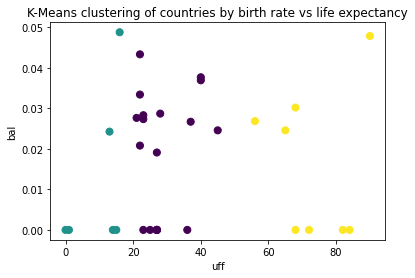

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means clustering of countries by birth rate vs life expectancy')
plt.xlabel("uff")
plt.ylabel("bal")
plt.show()

In [59]:
print("\nNumber of countries in each cluster:")
print(Counter(labels))


Number of countries in each cluster:
Counter({0: 19, 2: 8, 1: 6})


In [60]:
# Get cluster indices
clusters_indices = defaultdict(list)
for index, c in enumerate(labels):
    clusters_indices[c].append(index)


In [62]:
x = 0
method= data["method"]
while x < clust_num:
    print("\nCluster " + str(x + 1))
    print("----------")
    for i in clusters_indices[x]:
        print(method[i])
    print("----------")
    print("Mean callTime:")
    print(centers[x][0])
    print("Mean TF:")
    print(centers[x][1])
    x+=1


Cluster 1
----------
android.os.Handler#dispatchMessage android.os.Handler#handleCallback androidx.fragment.app.m$d#run androidx.fragment.app.m#Q androidx.fragment.app.m#L0 androidx.fragment.app.m#T androidx.fragment.app.m#S androidx.fragment.app.a#A androidx.fragment.app.m#z0 androidx.fragment.app.m#y0 androidx.fragment.app.m#A0 androidx.fragment.app.m#B0 androidx.fragment.app.r#r androidx.fragment.app.Fragment#W1 androidx.fragment.app.c#x1 android.app.Dialog#show android.app.Dialog#dispatchOnCreate androidx.appcompat.app.d#onCreate androidx.appcompat.app.AlertController#f androidx.appcompat.app.i#setContentView androidx.appcompat.app.h#D android.view.LayoutInflater#inflate android.view.LayoutInflater#inflate android.view.LayoutInflater#inflate android.view.LayoutInflater#rInflateChildren android.view.LayoutInflater#rInflate android.view.LayoutInflater#rInflateChildren android.view.LayoutInflater#rInflate android.view.LayoutInflater#rInflateChildren android.view.LayoutInflater#rInfla